In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import svm

Loading the iris data

In [2]:
iris = load_iris(as_frame=True,return_X_y=False)

Splitting the independent and dependent variable

In [3]:
X = iris.data
y = iris.target

In [4]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

lets do the Correlation Analysis for the model

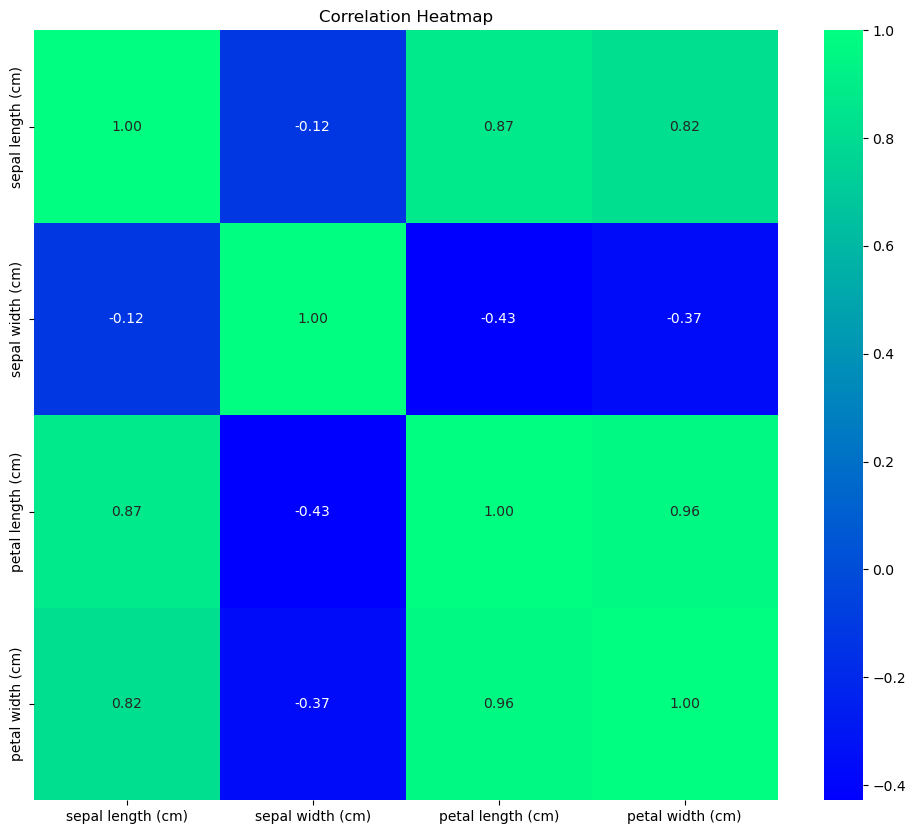

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='winter', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

lets drop columns sepal lenght and sepal width

In [9]:
data = X.drop(['sepal length (cm)','sepal width (cm)'],axis=1)

In [10]:
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

data = pd.DataFrame(sc.fit_transform(data))

In [12]:
data.columns = ['petal_length (cm)','petal_width (cm)']

In [13]:
data.head()

,petal_length (cm),petal_width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


cluster sum of square and elbow method

Cluster 10 Inertia 0.3768550049918249


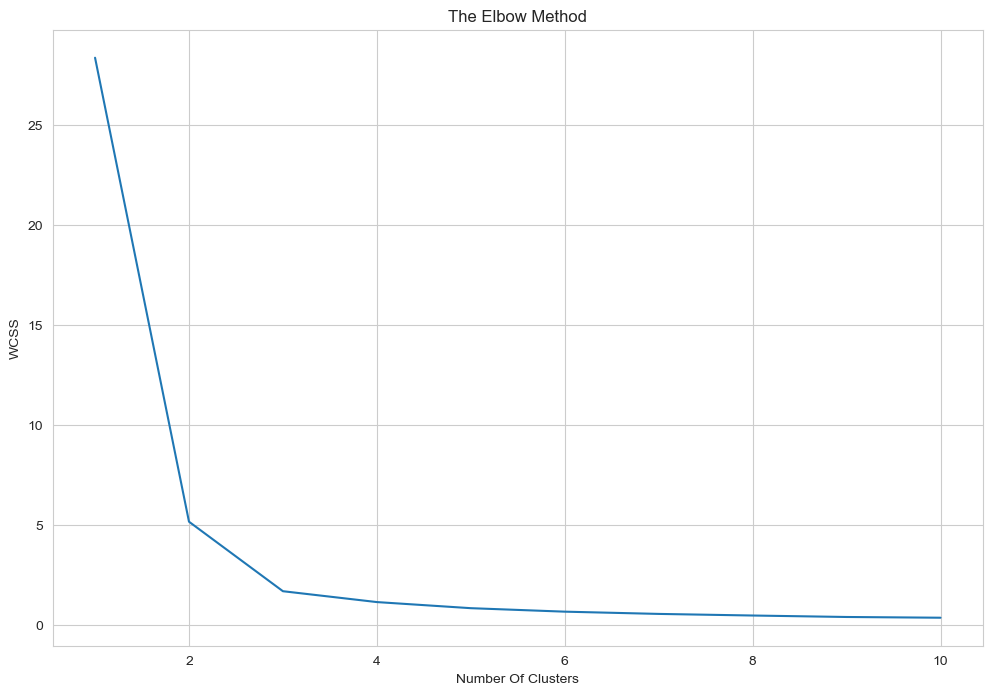

In [14]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
from sklearn.cluster import KMeans
wcss = []  
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init = 'k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
print("Cluster", i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

from the elbow plot we can see that optimal value of K=3

let fit the kmean model

In [15]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter =300, n_init = 10, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [16]:
y_kmeans = kmeans.fit_predict(data)

In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

lets visualize our model

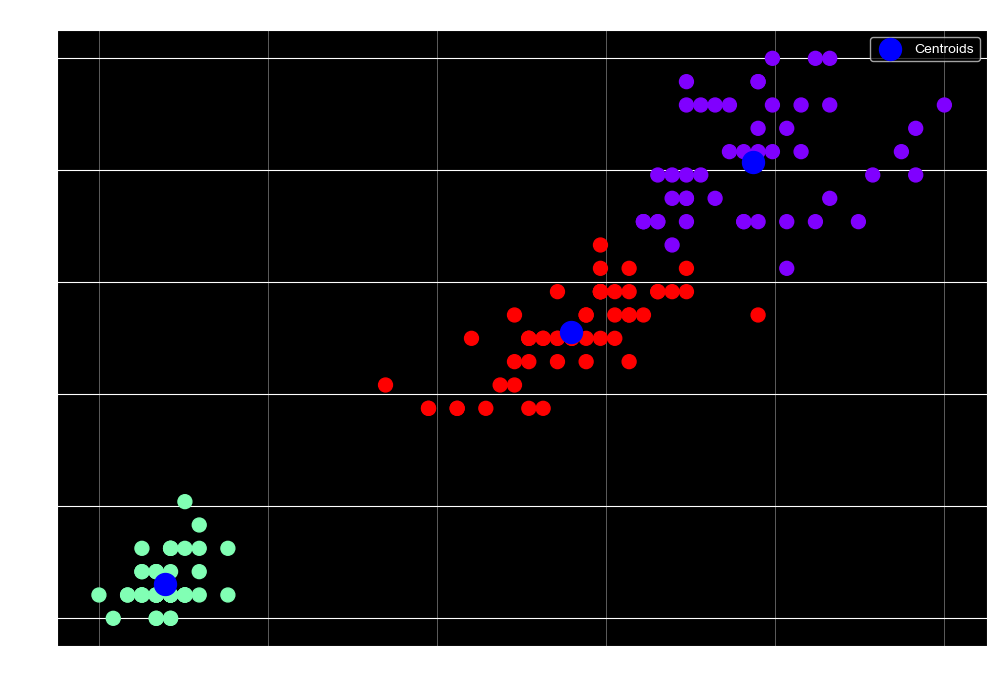

In [18]:
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
plt.grid(True, axis='x', color='gray', linewidth=0.5)
# Getting the cluster labels 
cluster_labels = kmeans.labels_


# Getting the centers
cluster_centers = kmeans.cluster_centers_

# Plotting the data points as well as cluster centers
plt.scatter(data['petal_length (cm)'], data['petal_width (cm)'], c=cluster_labels, cmap='rainbow', s=100)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', s=250, label='Centroids')
plt.xlabel('Petal Length cm')
plt.ylabel('Petal Width cm')
plt.title('K-Means Clustering with optimal value of clusters as 3')
plt.legend()
plt.show()

## section two

In [19]:
df1 = pd.read_csv("heart.csv")
df1.head(n=5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
df1.shape

(918, 12)

In [22]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


lets split the data into two (dependent and independent)

In [24]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [25]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


Removing Outliers Using Z score with a threshold of 3

In [26]:
import pandas as pd
from scipy import stats

# Get only the numeric columns from the DataFrame
numeric_columns = df1.select_dtypes(include='number')

# Calculate Z-scores for each numeric column
z_scores = stats.zscore(numeric_columns)

# Find rows with Z-score greater than 3 or less than -3 (in absolute value)
outlier_rows = (abs(z_scores) > 3).any(axis=1) | (abs(z_scores) < -3).any(axis=1)

# Remove outlier rows from the DataFrame in place
df1 = df1[~outlier_rows]

In [27]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,132.027809,198.005562,0.232481,136.917686,0.861513,0.547275
std,9.456073,17.120895,107.157779,0.422649,25.356740,1.007626,0.498037
min,28.000000,80.000000,0.000000,0.000000,63.000000,-2.000000,0.000000
25%,47.000000,120.000000,174.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,4.000000,1.000000


Converting Categorical String Columns to Numeric Using Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Sex'] = encoder.fit_transform(df1["Sex"])
df1["ChestPainType"] = encoder.fit_transform(df1["ChestPainType"])
df1["RestingECG"] = encoder.fit_transform(df1["RestingECG"])
df1["ExerciseAngina"] = encoder.fit_transform(df1["ExerciseAngina"])
df1["ST_Slope"] = encoder.fit_transform(df1["ST_Slope"])

<Axes: xlabel='HeartDisease', ylabel='count'>

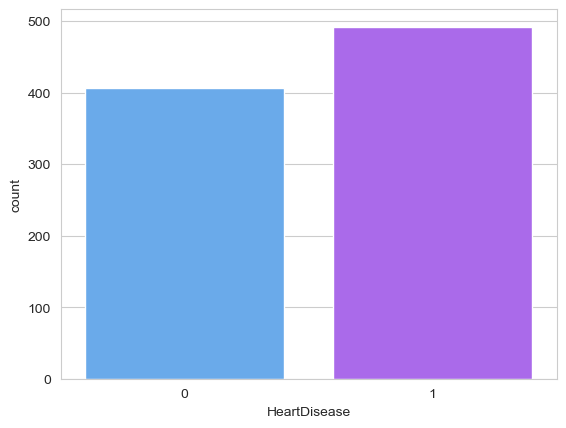

In [29]:
sns.set_style("whitegrid")
sns.countplot(x = "HeartDisease",data = df1,palette='cool')

In [30]:
df1['HeartDisease'].value_counts()

1    492
0    407
Name: HeartDisease, dtype: int64

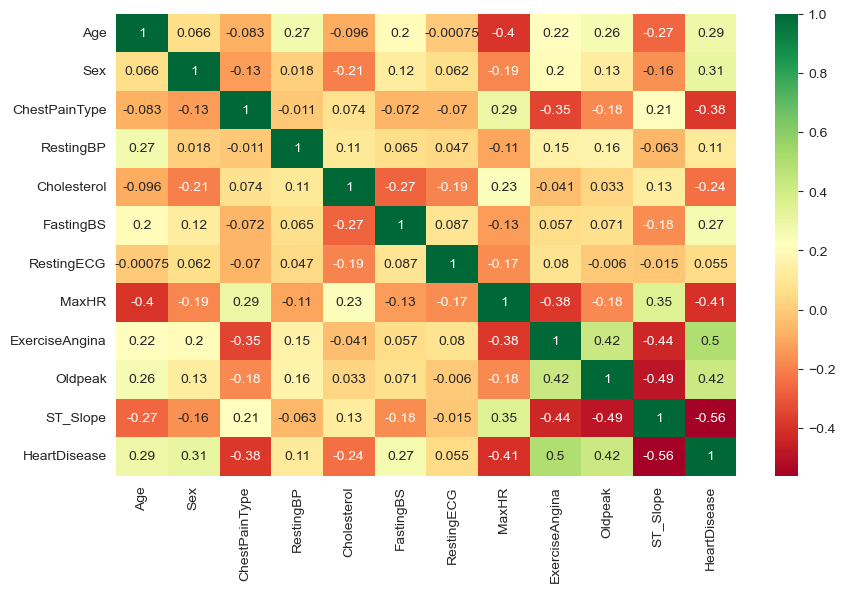

In [31]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [10,6]
sns.heatmap(df1[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')
plt.show()

In [32]:
df1[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']].corr()['HeartDisease']

Age               0.286672
Sex               0.309505
ChestPainType    -0.381915
RestingBP         0.110266
Cholesterol      -0.239056
FastingBS         0.267794
RestingECG        0.054617
MaxHR            -0.406112
ExerciseAngina    0.497990
Oldpeak           0.419697
ST_Slope         -0.561294
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

My Inferences on the above confusion Matrix

According to the above confusion matrix, RestingECG has the strongest correlation with the target feature HeartDisease, followed by ExerciseAngina, Oldpeak, Sex, Age, FastingBS, RestingBP.

In [33]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]


In [34]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [35]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

Data Preprocessing Using Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Performing train test split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

Fitting SVM model on the dataset

In [38]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

Making predictions on the unseen data

In [39]:
y_predsvm = model_svm.predict(X_test)

In [40]:
y_predsvm

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

Performing Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(model_svm, X_train, y_train, cv=10, scoring='accuracy')
scores_svm

array([0.77777778, 0.86111111, 0.90277778, 0.90277778, 0.875     ,
       0.80555556, 0.875     , 0.77777778, 0.91666667, 0.78873239])

In [42]:
print("The average cross validation accuracy of svm model is",scores_svm.mean())

The average cross validation accuracy of svm model is 0.8483176838810642


Confusion Matrix:


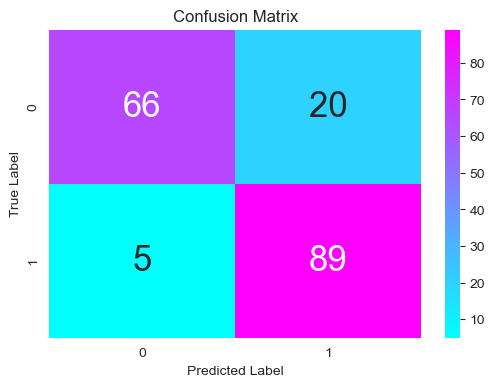

In [43]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_svm = confusion_matrix(y_test, y_predsvm)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_svm, annot=True ,cmap = "cool" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [44]:
cf_svm

array([[66, 20],
       [ 5, 89]], dtype=int64)

In [45]:
precision_svm = precision_score(y_test, y_predsvm)
recall_svm = recall_score(y_test, y_predsvm)
f1_score_svm = f1_score(y_test, y_predsvm)
accuracy_svm = accuracy_score(y_test,y_predsvm)

print('Accuracy:', accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1 Score:', f1_score_svm)

Accuracy: 0.8611111111111112
Precision: 0.8165137614678899
Recall: 0.9468085106382979
F1 Score: 0.8768472906403939


Fit Logistic Regression Model

In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred_logistic = logistic_model.predict(X_test)

In [48]:
y_pred_logistic

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

Performing cross Validation on the logistic regression model

In [49]:
from sklearn.model_selection import cross_val_score
scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=10, scoring='accuracy')
scores_logistic

array([0.76388889, 0.86111111, 0.91666667, 0.91666667, 0.875     ,
       0.79166667, 0.90277778, 0.79166667, 0.91666667, 0.8028169 ])

In [50]:
print("The mean accuracy of logistic reg model is",scores_logistic.mean())

The mean accuracy of logistic reg model is 0.8538928012519561


Confusion Matrix:


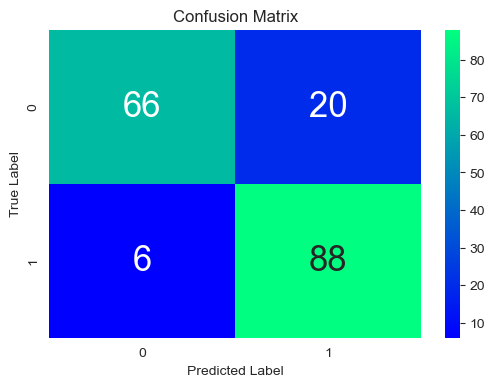

In [51]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_logistic = confusion_matrix(y_test, y_pred_logistic)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_logistic, annot=True ,cmap = "winter" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
cf_logistic

array([[66, 20],
       [ 6, 88]], dtype=int64)

In [53]:
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic  = f1_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)

print('Accuracy:', accuracy_logistic)
print('Precision:', precision_logistic)
print('Recall:', recall_logistic)
print('F1 Score:', f1_logistic)

Accuracy: 0.8555555555555555
Precision: 0.8148148148148148
Recall: 0.9361702127659575
F1 Score: 0.8712871287128713


Fit Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1], dtype=int64)

In [57]:
from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')
scores_rf

array([0.79166667, 0.86111111, 0.93055556, 0.91666667, 0.875     ,
       0.80555556, 0.84722222, 0.77777778, 0.90277778, 0.83098592])

Confusion Matrix:


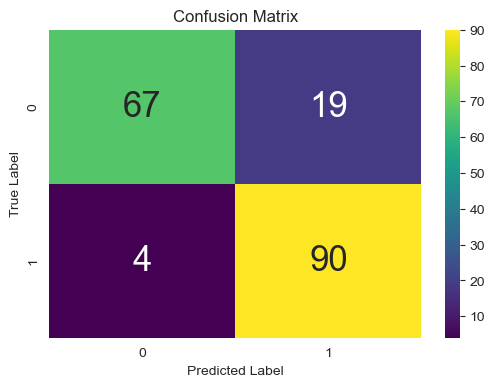

In [58]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_rf = confusion_matrix(y_test, y_pred_rf)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_rf, annot=True ,cmap = "viridis" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

lets get the output for Accuracy,precision and F1 output

In [59]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf  = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test,y_pred_rf)

print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)

Accuracy: 0.8722222222222222
Precision: 0.8256880733944955
Recall: 0.9574468085106383
F1 Score: 0.8866995073891627


## summary evaluation for all the model before pca

Accuracy: 0.86111111, and this mean tha The accuracy of the SVM model is approximately 86 percent. it show  that the model correctly predicts the target class for about 86.11%

Precision: 0.8165137614678899, The SVM model is approximately 82 percent. which show that the model predicts a positive (heart diseased)
F1 Score: F1 Score: 0.8768472906403939, this mean that SVM model is balanced in properly predicting positive cases and avoiding false positives and false negatives, according to the F1 score result.
The SVM model's confusion matrix thus expalin further: True Positive (TP): 66 positive predictions are correct. False Positive (FP): 20 instances are predicted as positive when they are not. True Negative (TN): 89 instances are predicted to be negative. False Negative (FN): 5 instances are predicted as negative when they are not.

## For  Regression Analysis

The average cross-validation accuracy is 0.8544

The accuracy is 0.855. In the test set, the model correctly predicts approximately 85.56 percent.

The precision is 0.8148148148148. When the model predicts a positive case, it is approximately 81.48 percent correct.

Recall rate: 93.62% (0.9361702127659575). The model correctly identifies approximately 93.62% of the actual positive instances in the dataset.

F1 score: 0.8712871287128713 (equivalent to 87.13%). The F1 score is a balanced measure that takes precision and recall into account.The F1 score of 87.13% demonstrates an evenly distributed performance in terms of recall and precision.

In [60]:
## principal component Analysis

In [61]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

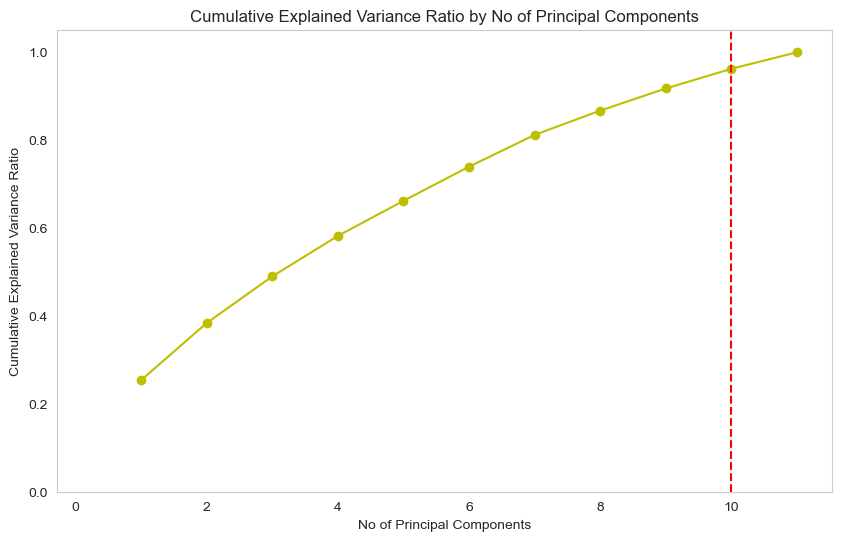

In [62]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Find the number of componentsm that cover 90% of variance
threshold_var = 0.95
num_components_to_retain = np.argmax(cumulative_var >= threshold_var) + 1


# Visualize the explained variance ratio for each principal component
plt.hist(range(1, len(cumulative_var) + 1), cumulative_var)
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', color='y')
plt.axvline(x=num_components_to_retain, color='r', linestyle='--')
plt.xlabel('No of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by No of Principal Components')
plt.grid()
plt.show()

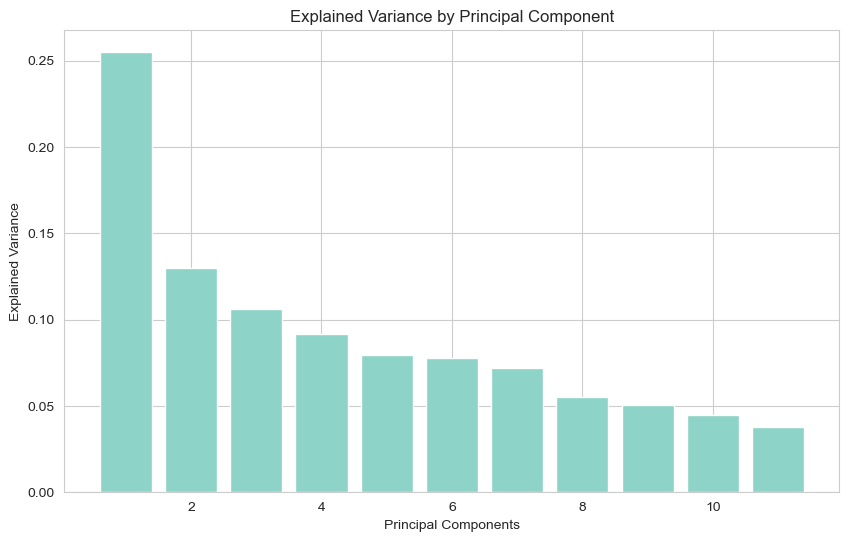

In [63]:
plt.figure(figsize=(10, 6))
explained_var = pca.explained_variance_ratio_
number_of_components = len(explained_var)

plt.bar(range(1, number_of_components + 1), explained_var)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

In [64]:
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X_scaled)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [66]:
pca_data = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(num_components_to_retain)])

In [67]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.260394,-0.196017,-0.315994,-0.473200,-1.380116,-0.042161,-0.720194,-0.044691,-0.053387,0.302054
1,-1.109802,-1.084683,1.494787,-0.247159,0.450455,1.364743,0.287679,-1.605967,-0.276943,0.853561
2,-1.087917,1.036894,-0.615630,-2.023368,-0.647999,-0.039667,0.388549,0.886641,-0.928754,0.913196
3,1.001422,-1.195743,-0.623414,-1.067789,1.661355,0.416247,-0.143105,-0.947327,-0.775901,-0.001257
4,-1.022416,0.321124,1.302148,-0.605039,-1.002041,-0.798221,0.887925,-0.158102,-0.394602,0.216712
...,...,...,...,...,...,...,...,...,...,...
894,-1.149727,-0.038444,-0.456479,1.047102,-0.601535,1.118055,1.909169,0.879365,-0.772013,0.613187
895,2.107299,-0.317096,1.250514,1.265070,-0.191531,0.735528,-1.127808,0.647931,1.947544,0.496436
896,1.701101,0.019119,-0.867957,-0.315922,0.066428,-0.519533,0.461841,-0.403853,-0.047164,-0.274550
897,-1.727297,-1.338502,0.471090,1.013752,1.535879,-0.170826,-0.106719,-0.736963,0.114573,0.447635


fit model After PCA

In [68]:
model_svm_pca = svm.SVC(kernel='linear')
model_svm_pca.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
y_pred_svm_pca = model_svm_pca.predict(X_test)
y_pred_svm_pca

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

In [70]:
from sklearn.model_selection import cross_val_score
scores_svm_pca = cross_val_score(model_svm_pca, X_train, y_train, cv=10, scoring='accuracy')
scores_svm_pca

array([0.77777778, 0.84722222, 0.90277778, 0.875     , 0.875     ,
       0.80555556, 0.88888889, 0.76388889, 0.91666667, 0.78873239])

In [71]:
print("The average accuracy of SVM after pca is",scores_svm_pca.mean())

The average accuracy of SVM after pca is 0.8441510172143974


Confusion Matrix:


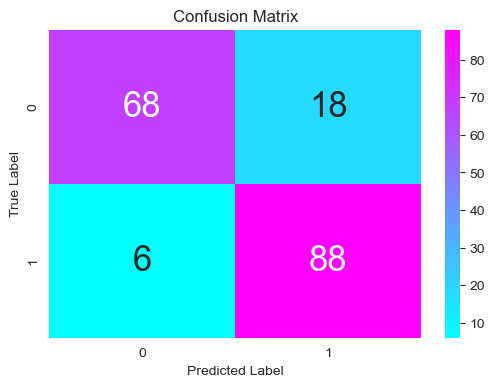

In [72]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_svm_pca = confusion_matrix(y_test, y_pred_svm_pca)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_svm_pca, annot=True ,cmap = "cool" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Classification report After PCA

In [73]:
precision_svm_pca = precision_score(y_test, y_pred_svm_pca)
recall_svm_pca = recall_score(y_test, y_pred_svm_pca)
f1_score_svm_pca = f1_score(y_test, y_pred_svm_pca)
accuracy_svm_pca = accuracy_score(y_test,y_pred_svm_pca)

print('Accuracy:', accuracy_svm_pca)
print('Precision:', precision_svm_pca)
print('Recall:', recall_svm_pca)
print('F1 Score:', f1_score_svm_pca)

Accuracy: 0.8666666666666667
Precision: 0.8301886792452831
Recall: 0.9361702127659575
F1 Score: 0.88


Regression after PCA

In [74]:
logistic_model_pca = LogisticRegression()
logistic_model_pca.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred_logistic_pca = logistic_model_pca.predict(X_test)
y_pred_logistic_pca

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)

In [77]:
from sklearn.model_selection import cross_val_score
scores_logistic_pca = cross_val_score(logistic_model_pca, X_train, y_train, cv=10, scoring='accuracy')
scores_logistic_pca

array([0.75      , 0.83333333, 0.90277778, 0.875     , 0.86111111,
       0.79166667, 0.90277778, 0.79166667, 0.91666667, 0.8028169 ])

In [78]:
print("The mean accuracy of Logistic Regression Model after PCA is",scores_logistic_pca.mean())

The mean accuracy of Logistic Regression Model after PCA is 0.8427816901408451


## confusion matrix after pca

Confusion Matrix:


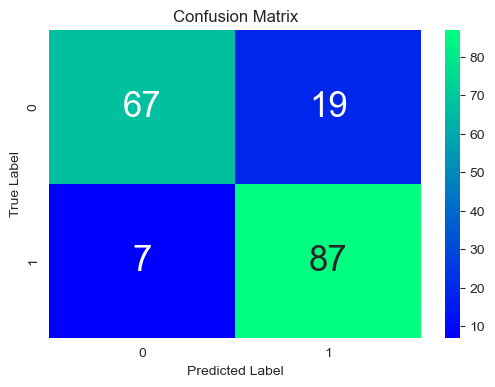

In [80]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_logistic_pca = confusion_matrix(y_test, y_pred_logistic_pca)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_logistic_pca, annot=True ,cmap = "winter" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##  Conclusion:

The SVM model after PCA performs similarly to the SVM model without PCA with less dimensionality. It achieves similar accuracy, slightly higher precision, and an F1 score. Even though the SVM model without PCA performs marginally better in terms of recall, the SVM model after PCA has improved accuracy, which is critical when predicting positive cases.
